In [4]:
from sklearn.datasets import load_iris

iris=load_iris()
iris_data=iris.data
iris_label=iris.target

print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris_data,iris_label,test_size=0.2)


In [13]:
print(x_test[:,1])

[3.  3.1 3.2 3.  4.1 2.8 3.  2.3 3.4 2.5 2.2 2.7 3.1 3.  2.9 3.  3.4 3.9
 3.6 2.8 3.5 3.  2.6 2.5 2.9 3.4 3.  3.  3.3 3.3]


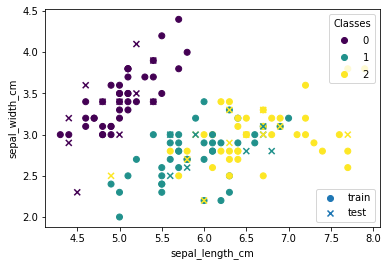

In [7]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
train=ax.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='o')
test=ax.scatter(x_test[:,0],x_test[:,1],c=y_test,marker='x')

legend1=ax.legend(*train.legend_elements(),title="Classes",loc="upper right")
ax.add_artist(legend1)

legend2=ax.legend((train,test),('train','test'),loc='lower right')
plt.xlabel('sepal_length_cm')
plt.ylabel('sepal_width_cm')
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classfier=KNeighborsClassifier(n_neighbors=5)
classfier.fit(x_train,y_train)

y_pred=classfier.predict(x_test)


In [22]:
from sklearn.metrics import accuracy_score

error=[]
for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error.append(1-accuracy_score(pred_i,y_test))


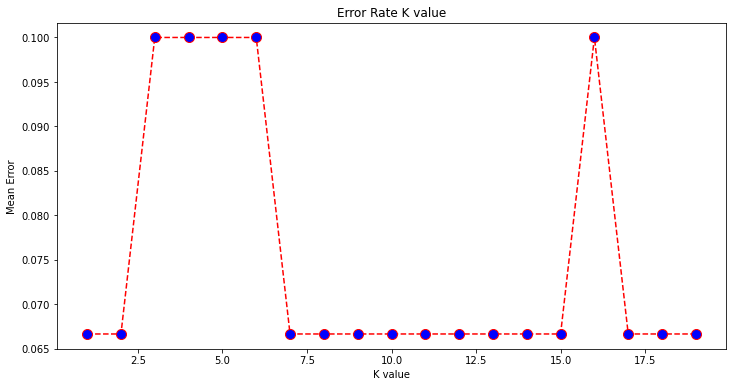

In [23]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',
         markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')
plt.show()


In [28]:
knn=KNeighborsClassifier(n_neighbors=10,metric='manhattan')


In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [31]:
#define the weight
def my_distance(distance):
  return 1/(distance**2+le-20)

knn=KNeighborsClassifier(n_neighbors=10,weights=my_distance)
classfier.fit(x_train,y_train)

y_pred=classfier.predict(x_test)


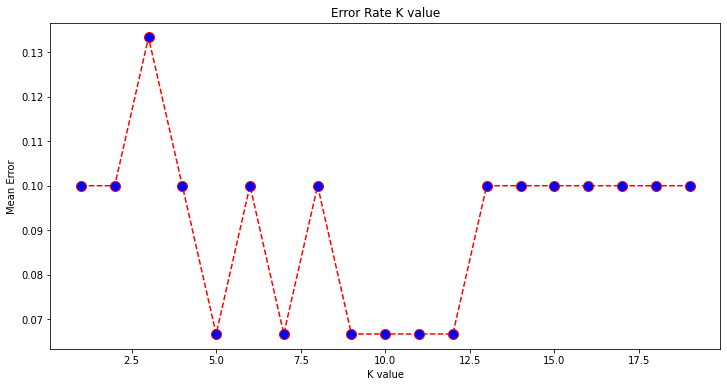

In [32]:
error=[]
for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error.append(1-accuracy_score(pred_i,y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,20),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',
         markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')
plt.show()
